In [73]:
import pandas as pd 

In [75]:
file_path = r"C:\Users\suvee\Documents\Intellipat\Python Assignments\Projects\Customer_Churn_Project\customer_churn.csv"
customer_churn_df = pd.read_csv(file_path)

# Display the first few rows to understand the dataset
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1

In [77]:
# Performing the required data manipulations

# 1. Extract the 5th column and store it in ‘customer_5’
customer_5 = customer_churn_df.iloc[:, 4]

# 2. Extract the 15th column and store it in ‘customer_15’
customer_15 = customer_churn_df.iloc[:, 14]

# 3. Extract all the male senior citizens whose payment method is electronic check
senior_male_electronic = customer_churn_df[
    (customer_churn_df['gender'] == 'Male') &
    (customer_churn_df['SeniorCitizen'] == 1) &
    (customer_churn_df['PaymentMethod'] == 'Electronic check')
]

# 4. Extract all those customers whose tenure is greater than 70 months or their monthly charges are more than $100
customer_total_tenure = customer_churn_df[
    (customer_churn_df['tenure'] > 70) |
    (customer_churn_df['MonthlyCharges'] > 100)
]

# 5. Extract all the customers whose contract is of two years, payment method is mailed check, and churn is ‘Yes’
two_mail_yes = customer_churn_df[
    (customer_churn_df['Contract'] == 'Two year') &
    (customer_churn_df['PaymentMethod'] == 'Mailed check') &
    (customer_churn_df['Churn'] == 'Yes')
]

# 6. Extract 333 random records from the customer_churn dataframe
customer_333 = customer_churn_df.sample(n=333, random_state=42)

# 7. Get the count of different levels from the ‘Churn’ column
churn_counts = customer_churn_df['Churn'].value_counts()

# Display results for user review
{
    "customer_5": customer_5.head(),
    "customer_15": customer_15.head(),
    "senior_male_electronic_count": senior_male_electronic.shape[0],
    "customer_total_tenure_count": customer_total_tenure.shape[0],
    "two_mail_yes_count": two_mail_yes.shape[0],
    "customer_333_sample_count": customer_333.shape[0],
    "churn_counts": churn_counts
}

{'customer_5': 0    No
 1    No
 2    No
 3    No
 4    No
 Name: Dependents, dtype: object,
 'customer_15': 0    No
 1    No
 2    No
 3    No
 4    No
 Name: StreamingMovies, dtype: object,
 'senior_male_electronic_count': 298,
 'customer_total_tenure_count': 1259,
 'two_mail_yes_count': 3,
 'customer_333_sample_count': 333,
 'churn_counts': Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64}

# 2

In [79]:
import matplotlib.pyplot as plt

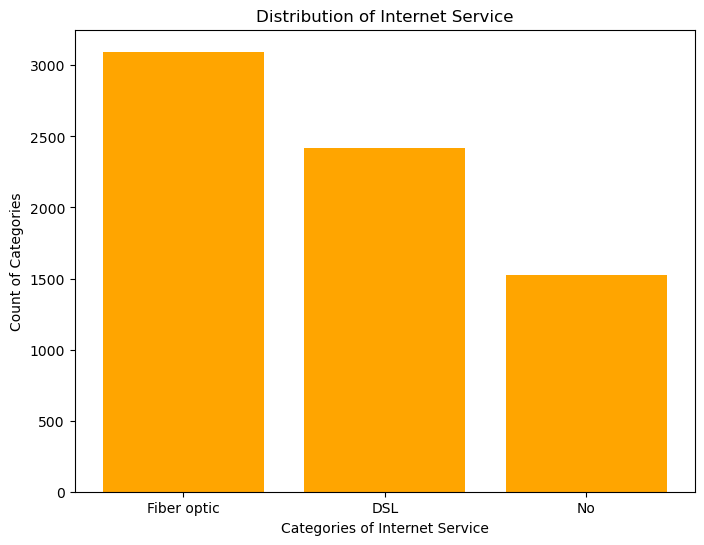

In [81]:
# Bar plot for the 'InternetService' column
plt.figure(figsize=(8, 6))
internet_service_counts = customer_churn_df['InternetService'].value_counts()
plt.bar(internet_service_counts.index, internet_service_counts.values, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

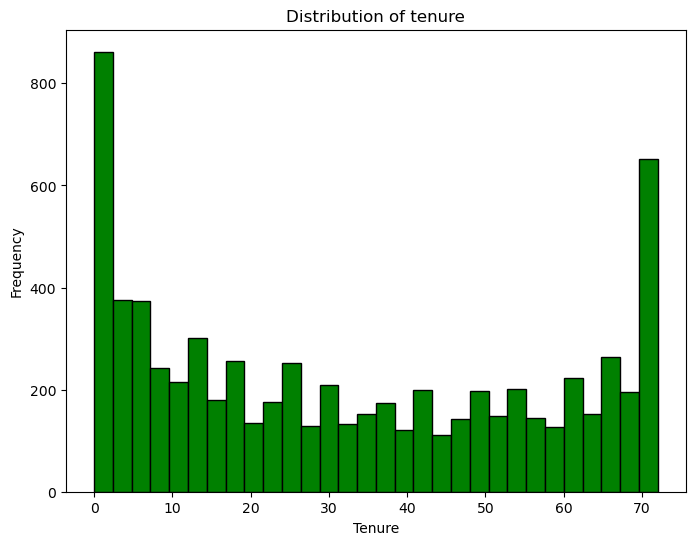

In [83]:
# Histogram for the 'tenure' column
plt.figure(figsize=(8, 6))
plt.hist(customer_churn_df['tenure'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

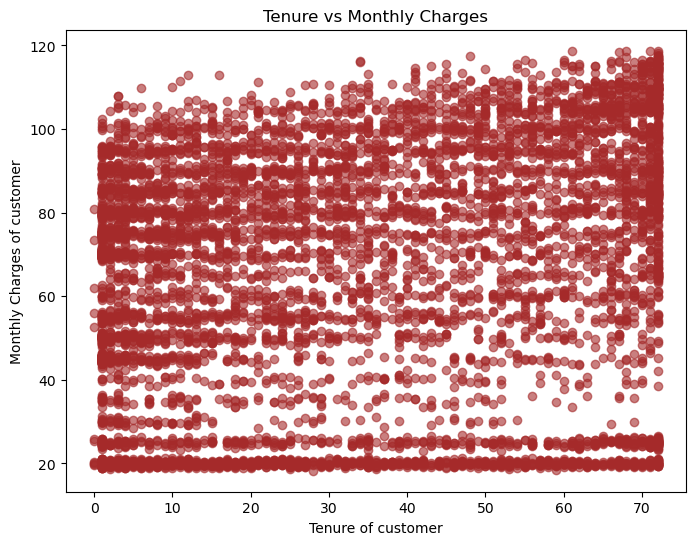

In [85]:
# Scatter plot between 'MonthlyCharges' and 'tenure'
plt.figure(figsize=(8, 6))
plt.scatter(customer_churn_df['tenure'], customer_churn_df['MonthlyCharges'], color='brown', alpha=0.6)
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.show()

<Figure size 800x600 with 0 Axes>

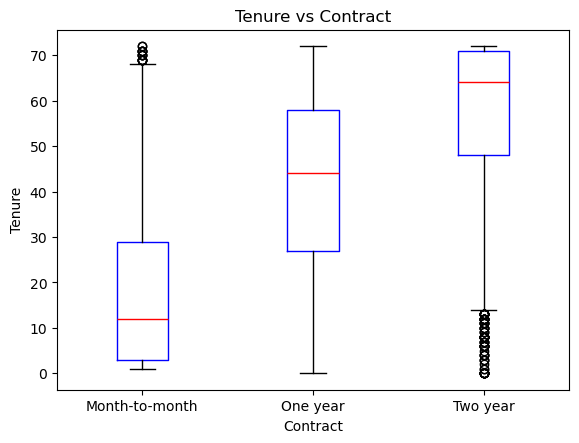

In [87]:
plt.figure(figsize=(8, 6))
customer_churn_df.boxplot(column='tenure', by='Contract', grid=False, color=dict(boxes='blue', whiskers='black', medians='red', caps='black'))
plt.title('Tenure vs Contract')
plt.suptitle('')  # Suppress default suptitle
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.show()

# 3

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [91]:
X = customer_churn_df[['tenure']]
y = customer_churn_df['MonthlyCharges']

In [93]:
# Splitting the dataset into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

In [99]:
# Calculating the error and RMSE
error = y_test - y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [101]:
# Displaying results
{
    "error_example": error.head(),
    "root_mean_square_error": rmse
}

{'error_example': 185    -30.306590
 2715   -42.185209
 3825   -51.475579
 1807    21.243410
 132    -24.898812
 Name: MonthlyCharges, dtype: float64,
 'root_mean_square_error': 29.07936015646814}

# 4

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [105]:
# Preprocessing: Encode 'Churn' column as binary
customer_churn_df['Churn'] = customer_churn_df['Churn'].map({'Yes': 1, 'No': 0})

In [107]:
# Splitting the dataset into train and test sets (65:35 ratio)
X_single = customer_churn_df[['MonthlyCharges']]
y_single = customer_churn_df['Churn']
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y_single, test_size=0.35, random_state=42
)

In [109]:
# Building the logistic regression model
logistic_model_single = LogisticRegression()
logistic_model_single.fit(X_train_single, y_train_single)

LogisticRegression()

In [111]:
# Splitting the dataset into train and test sets (80:20 ratio)
X_multi = customer_churn_df[['tenure', 'MonthlyCharges']]
y_multi = customer_churn_df['Churn']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

In [113]:
# Building the logistic regression model
logistic_model_multi = LogisticRegression()
logistic_model_multi.fit(X_train_multi, y_train_multi)

LogisticRegression()

In [115]:
# Predicting the values on the test set
y_pred_multi = logistic_model_multi.predict(X_test_multi)

In [119]:
y_pred_single = logistic_model_single.predict(X_test_single)

In [121]:
# Confusion matrix and accuracy for single-variable logistic regression
conf_matrix_single = confusion_matrix(y_test_single, y_pred_single)
accuracy_single = accuracy_score(y_test_single, y_pred_single)

In [123]:
# Display results again
results = {
    "single_variable_logistic": {
        "confusion_matrix": conf_matrix_single.tolist(),
        "accuracy": accuracy_single,
    },
    "multiple_variable_logistic": {
        "confusion_matrix": conf_matrix_multi.tolist(),
        "accuracy": accuracy_multi,
    }
}

results

{'single_variable_logistic': {'confusion_matrix': [[1797, 0], [669, 0]],
  'accuracy': 0.7287104622871047},
 'multiple_variable_logistic': {'confusion_matrix': [[944, 92], [193, 180]],
  'accuracy': 0.7977288857345636}}

# 5

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
# Splitting the dataset into train and test sets (80:20 ratio) for the decision tree
X_tree = customer_churn_df[['tenure']]
y_tree = customer_churn_df['Churn']
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42
)

In [131]:
# Building the decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(random_state=42)

In [133]:
# Predicting the values on the test set
y_pred_tree = decision_tree_model.predict(X_test_tree)

In [135]:
# Confusion matrix and accuracy for the decision tree
conf_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)
accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)

In [137]:
# Displaying the results
{
    "confusion_matrix_tree": conf_matrix_tree.tolist(),
    "accuracy_tree": accuracy_tree
}

{'confusion_matrix_tree': [[951, 85], [257, 116]],
 'accuracy_tree': 0.7572746628814763}

# 6

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
# Splitting the dataset into train and test sets (70:30 ratio) for the random forest
X_rf = customer_churn_df[['tenure', 'MonthlyCharges']]
y_rf = customer_churn_df['Churn']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.3, random_state=42
)

In [144]:
# Building the random forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [146]:
# Predicting the values on the test set
y_pred_rf = random_forest_model.predict(X_test_rf)

In [148]:
# Confusion matrix and accuracy for the random forest
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)

In [150]:
# Displaying the results
{
    "confusion_matrix_rf": conf_matrix_rf.tolist(),
    "accuracy_rf": accuracy_rf
}

{'confusion_matrix_rf': [[1341, 198], [308, 266]],
 'accuracy_rf': 0.7605300520586843}